In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('covtype (1).csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# Check missing values (dataset is complete)
print(df.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
# Convert target to 0-indexed classes
df['Cover_Type'] = df['Cover_Type'] - 1

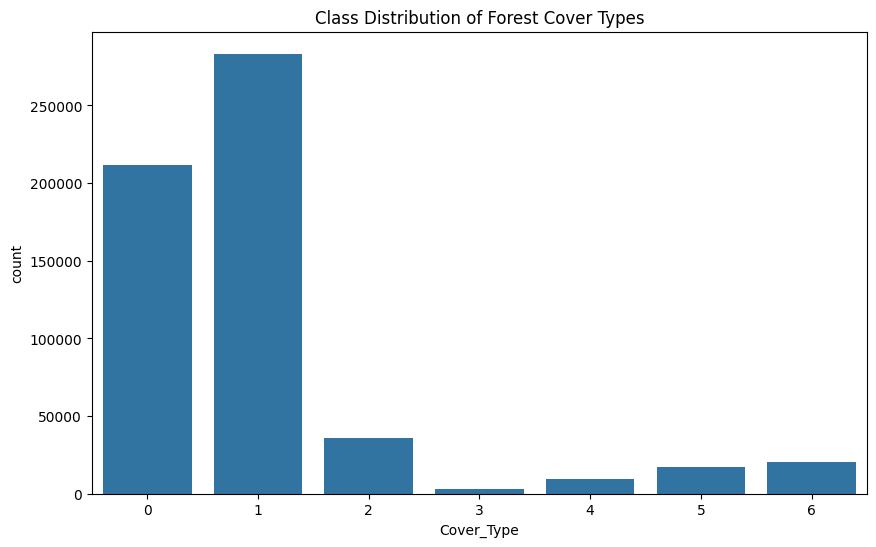

In [6]:
# Visualize class distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Class Distribution of Forest Cover Types')
plt.show()

In [7]:
# Create new features
df['Distance_To_Hydrology'] = np.sqrt(
    df['Horizontal_Distance_To_Hydrology']**2 +
    df['Vertical_Distance_To_Hydrology']**2
)


In [8]:
# Drop redundant features
df = df.drop(['Soil_Type15', 'Wilderness_Area4'], axis=1)  # Near-zero variance



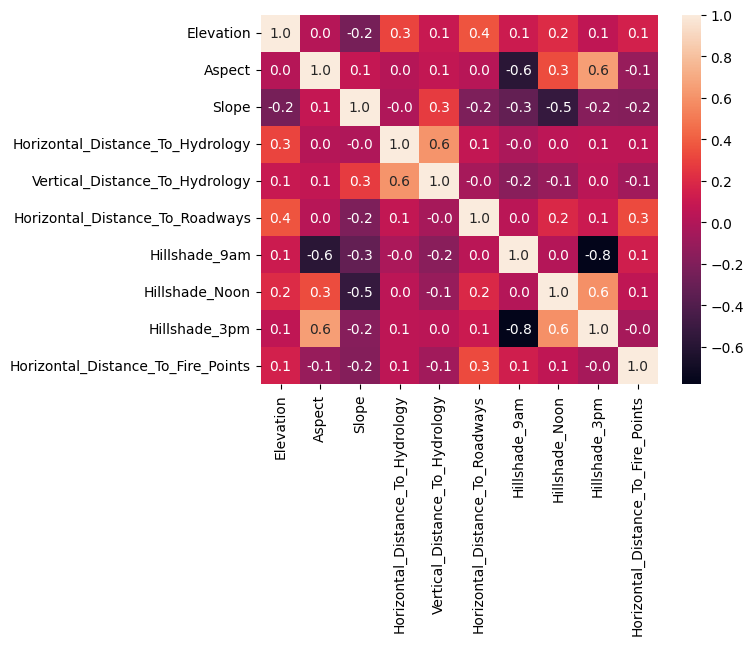

In [9]:
# Check feature correlations
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.show()

In [10]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(12,10))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    return model


C:\Users\Insha rana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.88      0.91      0.89      7151
           3       0.87      0.85      0.86       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.79      0.82      3473
           6       0.95      0.92      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



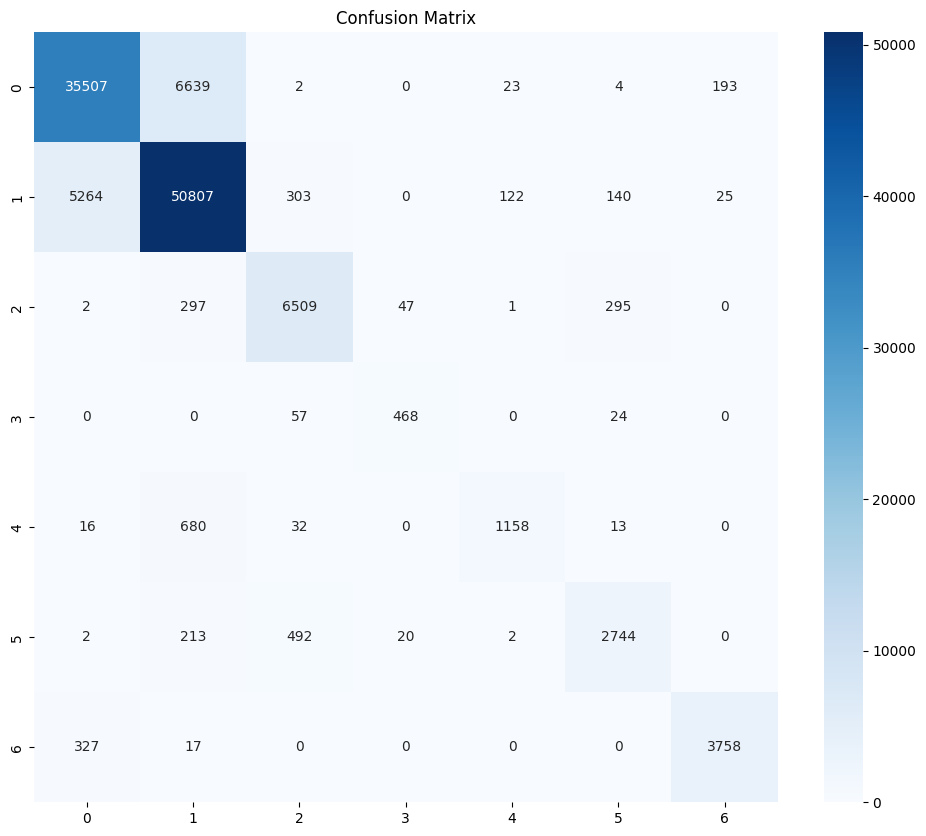

In [12]:
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
xgb.fit(X_train, y_train)
print("\nXGBoost Performance:")
xgb = evaluate_model(xgb, X_test, y_test)

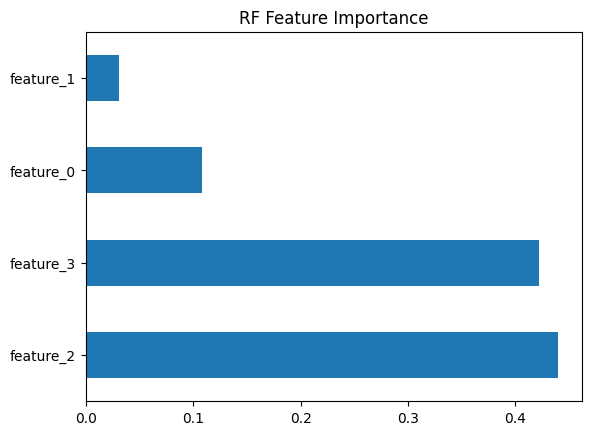

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_importance.nlargest(15).plot(kind='barh', title='RF Feature Importance')
plt.show()

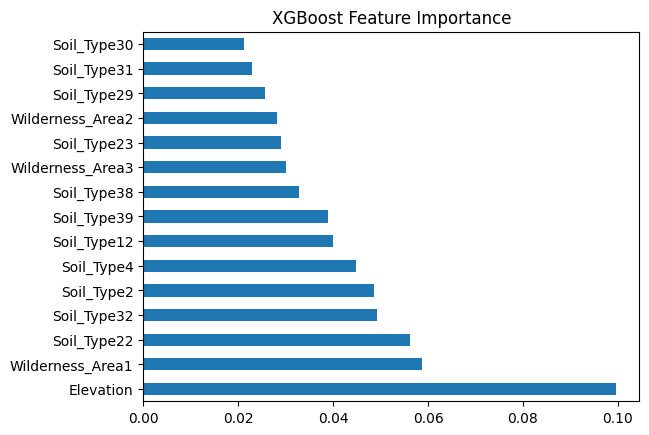

In [15]:
# XGBoost Feature Importance
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importance.nlargest(15).plot(kind='barh', title='XGBoost Feature Importance')
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Example dataset (replace this with your own)
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# For demonstration: dummy dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # fewer iterations = faster
    cv=2,      # fewer folds = faster
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit model
rf_random.fit(X_train, y_train)

# Results
print("Best parameters:", rf_random.best_params_)
print("Tuned RF Accuracy (CV):", rf_random.best_score_)

# Optional: Test set accuracy
y_pred = rf_random.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Tuned RF Accuracy (CV): 0.9333333333333333
Test Accuracy: 1.0


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_tuned = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
rf_tuned.fit(X_train, y_train)

print("Best parameters:", rf_tuned.best_params_)
print("Tuned RF Accuracy:", rf_tuned.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF Accuracy: 0.9583333333333334


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
from xgboost import XGBClassifier

# Define and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)


C:\Users\Insha rana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:20:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


Model Comparison:
           Model  Accuracy
0  Random Forest       1.0
1        XGBoost       1.0
2       Tuned RF       1.0


C:\Users\Insha rana\AppData\Local\Temp\ipykernel_6024\3883955186.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')


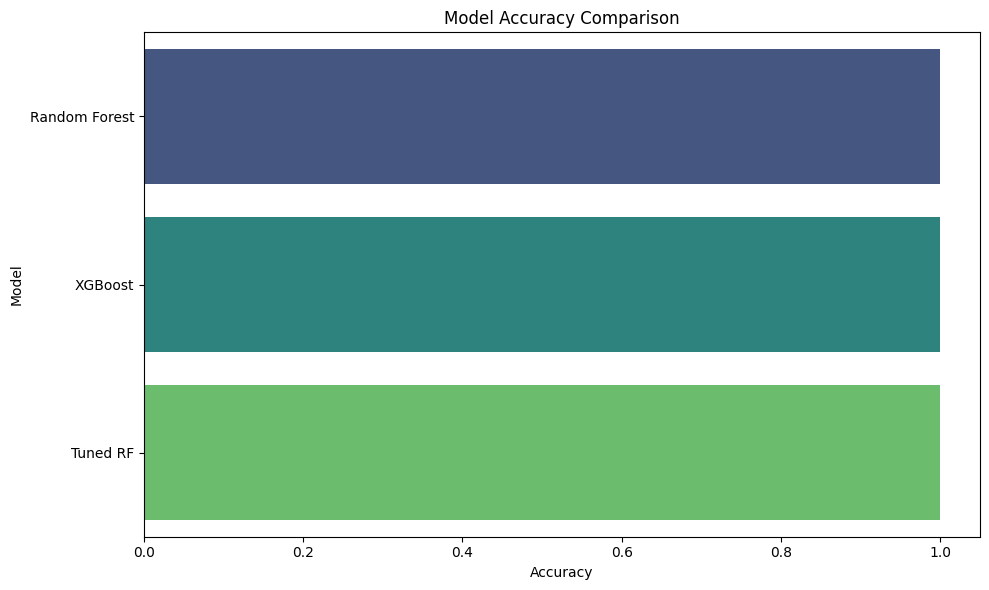

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Make sure models are already trained:
# rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)
# rf_tuned.fit(X_train, y_train)

# Create DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Tuned RF'],
    'Accuracy': [
        accuracy_score(y_test, rf.predict(X_test)),
        accuracy_score(y_test, xgb.predict(X_test)),
        accuracy_score(y_test, rf_tuned.predict(X_test))
    ]
})

# Print results
print("\nModel Comparison:")
print(results.sort_values('Accuracy', ascending=False))

# Plot results
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Optional: only if your accuracies are between 0.7 and 0.9
# plt.xlim(0.7, 0.9)

plt.tight_layout()
plt.show()


In [13]:
# Count of negative and positive samples
neg = sum(y_train == 0)
pos = sum(y_train == 1)

# Recommended formula from XGBoost docs
scale_pos_weight = neg / pos


In [14]:
from xgboost import XGBClassifier

xgb_balanced = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_balanced.fit(X_train, y_train)


C:\Users\Insha rana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:22:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Define the XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define the search space
search_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'max_depth': (3, 15),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'n_estimators': (50, 300),
    'gamma': (0, 5)
}

# Define BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_space,
    n_iter=30,  # You can increase this for better results
    cv=StratifiedKFold(n_splits=3),
    scoring='accuracy',  # Or 'roc_auc' for binary
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Run the search
bayes_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

C:\Users\Insha rana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:28:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
